In [1]:
# ! pip install sounddevice
# ! pip install librosa
# ! pip install torch
# ! pip install matplotlib

Import Libraries

In [16]:
import sounddevice as sd
import IPython.display as ipd
import importlib

Load Data

In [3]:
data_path = "./data/"
filename = "(02) dont kill the whale-1.wav"
ipd.Audio(data_path+filename)

In [4]:
from Dataset import AudioDataset, plot_spectrogram
from torch.utils.data import DataLoader

In [5]:
dataset = AudioDataset(data_path)

In [6]:
dl = DataLoader(dataset, batch_size=4)

In [7]:
sample = next(iter(dl))

In [8]:
sample.shape
# (batch_size, channel, height, width)

torch.Size([4, 1, 128, 216])

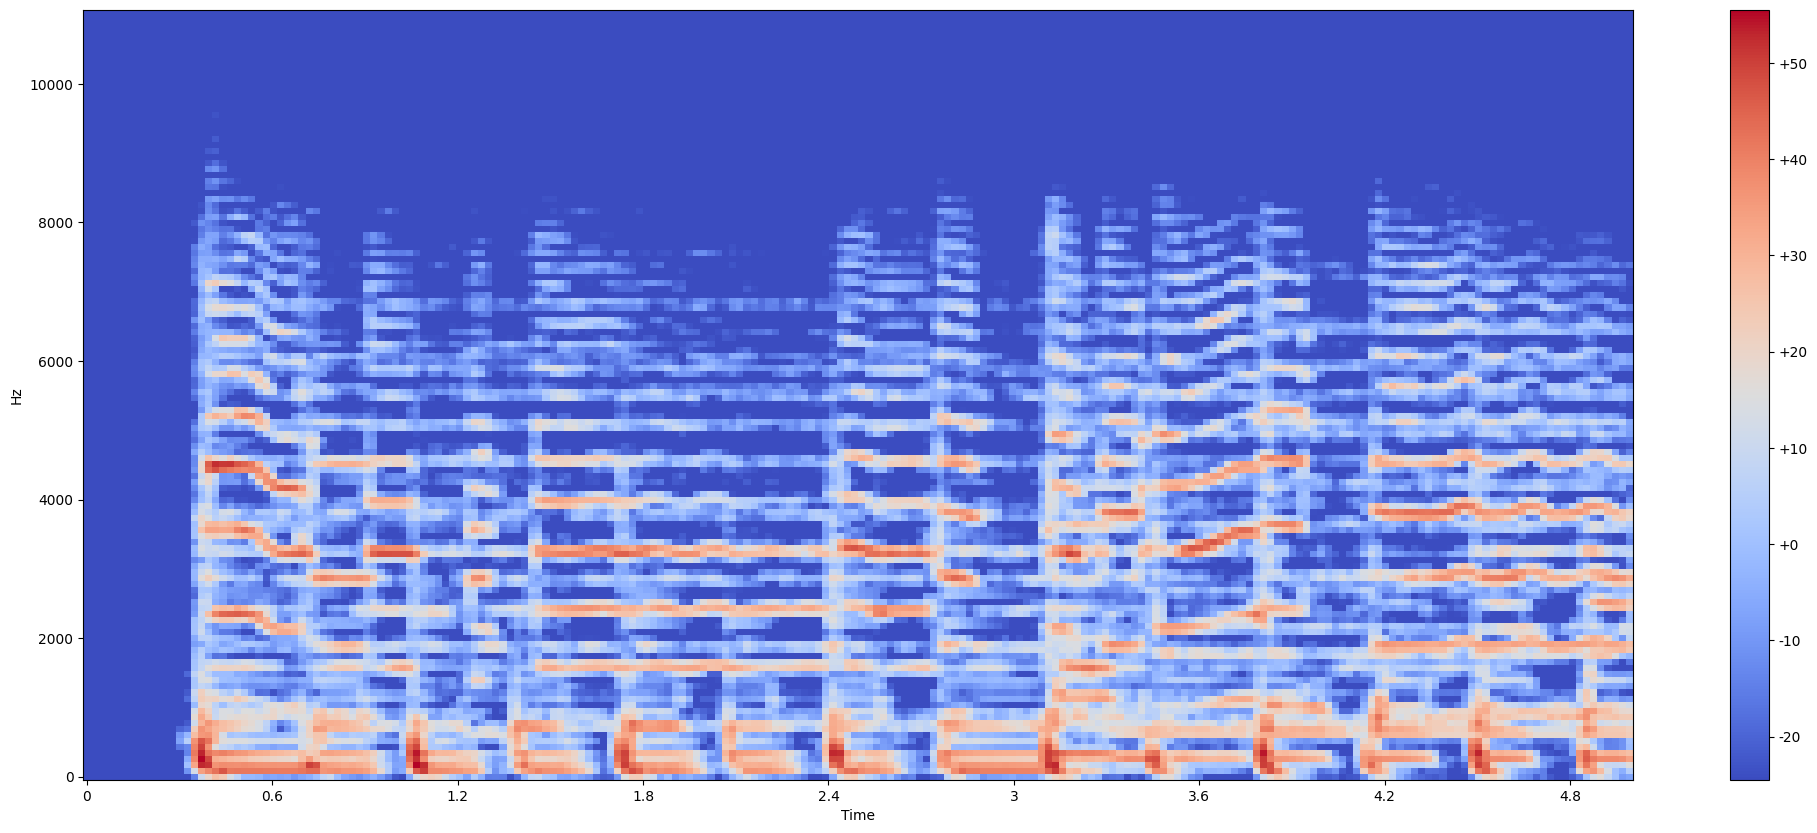

In [9]:
plot_spectrogram(sample[0][0], ylog=True)

Model

In [73]:
import DiffusionModel
importlib.reload(DiffusionModel)
from DiffusionModel import Block, DownBlock, UpBlock

In [74]:
block = Block(in_channels=1, out_channels=4, num_groups=1)
x = block.forward(sample)

In [75]:
x.shape

torch.Size([4, 4, 128, 216])

In [76]:
downPath = DownBlock(1)
upPath = UpBlock(1)

In [77]:
y = downPath.forward(sample)

x: torch.Size([4, 1, 128, 216])
first Layer: torch.Size([4, 16, 128, 216])


block1: torch.Size([4, 64, 128, 216])
block1 downsampled: torch.Size([4, 64, 64, 108])
block2: torch.Size([4, 128, 64, 108])
block2 downsampled: torch.Size([4, 128, 32, 54])
block3: torch.Size([4, 256, 32, 54])
block3 downsampled: torch.Size([4, 256, 16, 27])


In [78]:
z = upPath.forward(y)

x: torch.Size([4, 256, 16, 27])
upSample1: torch.Size([4, 256, 32, 54])
block1: torch.Size([4, 128, 32, 54])
upSample2: torch.Size([4, 128, 64, 108])
block2: torch.Size([4, 64, 64, 108])
upSample3: torch.Size([4, 64, 128, 216])
block3: torch.Size([4, 16, 128, 216])
last Layer: torch.Size([4, 1, 128, 216])
